# Make gradient plots for all chromosomes for all cancers

These plots look at each gene on each chromosome for each cancer type, look at how many patients have a gain and how many have a loss, and then take the difference and show it as a color somewhere between red for a positive number of patients and blue for a negative number.

In [1]:
import pandas as pd
import numpy as np
import cnvutils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get a table of counts of patients with gain or loss for each gene in each cancer
counts = cnvutils.get_counts_table()

In [3]:
# Define our colors
reds = ['#FFFFFF', '#FDF0F0', '#FCE2E2', '#FAD3D3', '#F8C5C5', '#F6B6B6', '#F5A7A7', '#F39999', '#F18A8A', '#EF7B7B', '#EE6D6D', '#EC5E5E', '#EA5050', '#E84141', '#E73232', '#E52424', '#E31515']
blues = ['#FFFFFF', '#F2F0FD', '#E5E0FA', '#D7D1F8', '#CAC2F5', '#BDB2F3', '#B0A3F0', '#A393EE', '#9684EB', '#8875E9', '#7B65E6', '#6E56E4', '#6147E1', '#5437DF', '#4628DC', '#3918DA', '#2C09D7']
gradient = blues[::-1] + reds

In [4]:
# Reshape data table
counts_pivot = counts.pivot_table(index=['Name', 'cancer', 'chromosome'], columns="variable")
counts_pivot.columns = counts_pivot.columns.to_flat_index()
counts_pivot = counts_pivot.drop(columns=('start_bp', 'gain'))
counts_pivot = counts_pivot.drop(columns=('end_bp', 'gain'))
counts_pivot = counts_pivot.rename(columns={counts_pivot.columns[0]: 'end_bp', counts_pivot.columns[1]: 'start_bp', counts_pivot.columns[2]: 'gain', counts_pivot.columns[3]: 'loss'})

In [5]:
counts_pivot['length'] = counts_pivot.end_bp - counts_pivot.start_bp
counts_pivot['value'] = counts_pivot.gain - counts_pivot.loss

In [6]:
# Map values to colors
def map_color(val):
    i = (val + 85) // 5
    if i < 0:
        i = 0
    if i > 33:
        i=33
    return gradient[int(i)]

In [7]:
counts_pivot['color'] = counts_pivot.value.apply(map_color)

In [8]:
counts_pivot

end_bp     start_bp  gain  loss  \
Name         cancer  chromosome                                         
A1BG         BRCA    19           58353492.0   58345178.0  22.0  14.0   
             CCRCC   19           58353492.0   58345178.0   3.0   0.0   
             COLON   19           58353492.0   58345178.0  22.0  16.0   
             ENDO    19           58353492.0   58345178.0   4.0   6.0   
             GBM     19           58353492.0   58345178.0  33.0   5.0   
             HNSCC   19           58353492.0   58345178.0  10.0   7.0   
             LSCC    19           58353492.0   58345178.0  23.0  18.0   
             LUAD    19           58353492.0   58345178.0  10.0  19.0   
             OVARIAN 19           58353492.0   58345178.0  15.0  31.0   
A1BG-AS1     COLON   19           58355455.0   58347718.0  22.0  16.0   
             ENDO    19           58355455.0   58347718.0   4.0   6.0   
             HNSCC   19           58355455.0   58347718.0  10.0   7.0   
             LSCC    19           58355455.0   58347718.0  23.0  18.0   
A1CF         BRCA    10           50885675.0   50799409.0  16.0  15.0   
             CCRCC   10           50885675.0   50799409.0   1.0  10.0   
             COLON   10           50885675.0   50799409.0   6.0   9.0   
             ENDO    10           50885675.0   50799409.0  17.0   3.0   
             GBM     10           50885675.0   50799409.0   0.0  75.0   
             HNSCC   10           50885675.0   50799409.0   3.0  10.0   
             LSCC    10           50885675.0   50799409.0  12.0  24.0   
             LUAD    10           50885675.0   50799409.0   2.0  15.0   
             OVARIAN 10           50885675.0   50799409.0  15.0   6.0   
A2M          BRCA    12            9116229.0    9067664.0  19.0  15.0   
             CCRCC   12            9116229.0    9067664.0  13.0   0.0   
             COLON   12            9116229.0    9067664.0  18.0  17.0   
             ENDO    12            9116229.0    9067664.0   6.0   1.0   
             GBM     12            9116229.0    9067664.0   4.0   3.0   
             HNSCC   12            9116229.0    9067664.0  24.0   7.0   
             LSCC    12            9116229.0    9067664.0  42.0   4.0   
             LUAD    12            9116229.0    9067664.0   9.0  21.0   
...                                      ...          ...   ...   ...   
ZYG11B       BRCA    1            52827336.0   52726453.0  14.0  28.0   
             CCRCC   1            52827336.0   52726453.0   1.0   4.0   
             COLON   1            52827336.0   52726453.0   0.0  56.0   
             ENDO    1            52827336.0   52726453.0   3.0   2.0   
             GBM     1            52827336.0   52726453.0   4.0   7.0   
             HNSCC   1            52827336.0   52726453.0   2.0  13.0   
             LSCC    1            52827336.0   52726453.0   2.0  30.0   
             LUAD    1            52827336.0   52726453.0   6.0  12.0   
             OVARIAN 1            52827336.0   52726453.0  19.0  11.0   
ZYX          BRCA    7           143391111.0  143381295.0  40.0  10.0   
             CCRCC   7           143391111.0  143381295.0  28.0   2.0   
             COLON   7           143391111.0  143381295.0  60.0   2.0   
             ENDO    7           143391111.0  143381295.0  12.0   2.0   
             GBM     7           143391111.0  143381295.0  76.0   1.0   
             HNSCC   7           143391111.0  143381295.0   9.0  17.0   
             LSCC    7           143391111.0  143381295.0  21.0  10.0   
             LUAD    7           143391111.0  143381295.0  16.0   4.0   
             OVARIAN 7           143391111.0  143381295.0  48.0   6.0   
ZYXP1        HNSCC   8           137425021.0  137424904.0  45.0   1.0   
ZZEF1        BRCA    17            4143030.0    4004445.0   8.0  59.0   
             CCRCC   17            4143030.0    4004445.0   1.0   5.0   
             COLON   17            4143030.0    4004445.0   1.0  69.0   
             ENDO    17

In [9]:
counts_pivot.reset_index(inplace=True)

In [10]:
# Get a nice ordering of chromosome
CHROMOSOMES = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']

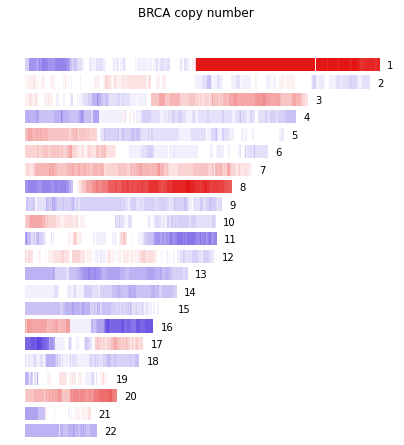

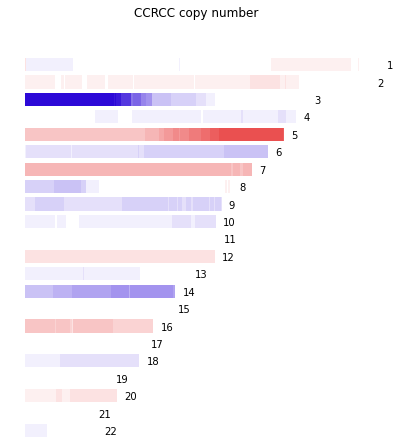

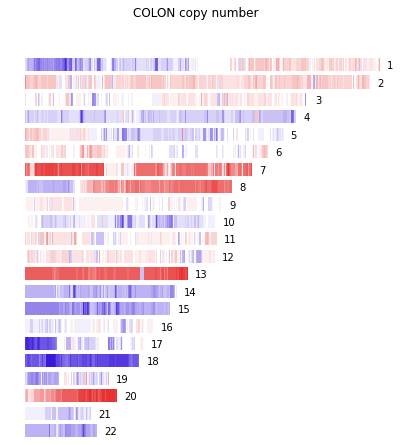

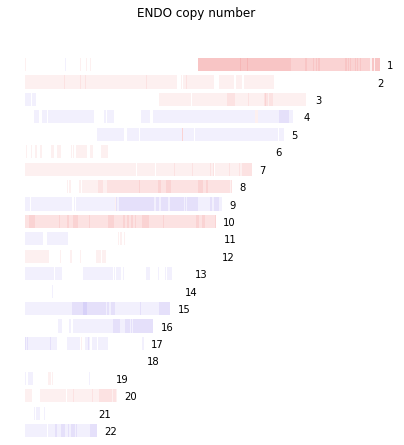

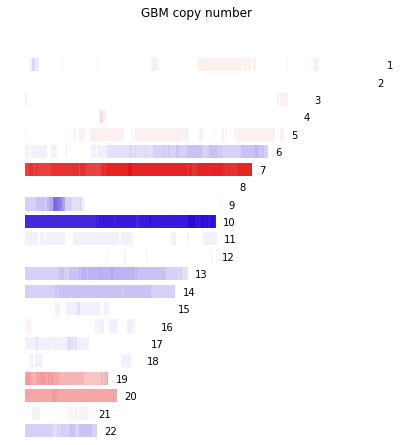

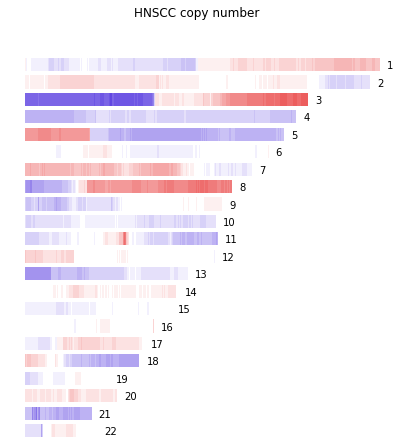

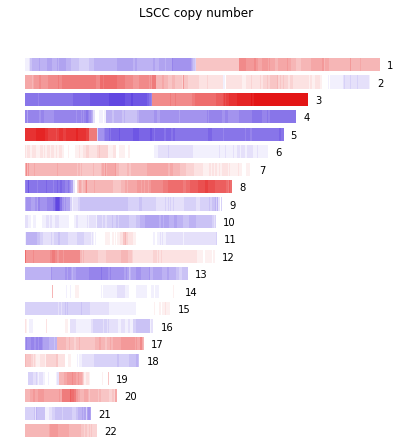

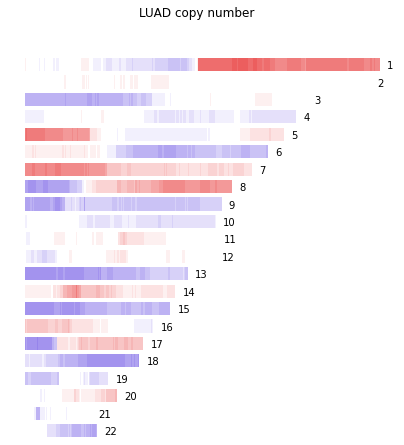

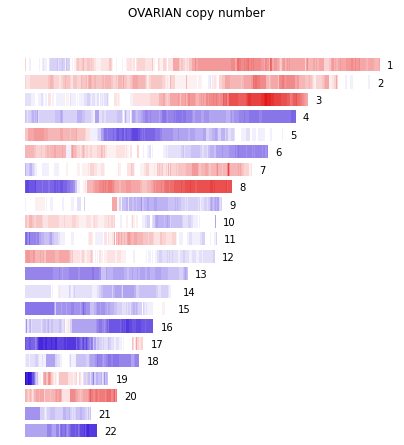

In [11]:
for cancer in counts.cancer.unique():
    fig, ax = plt.subplots(nrows=len(CHROMOSOMES),figsize=(7,7), sharex=True, sharey=False)
    cancer_df = counts_pivot[counts_pivot.cancer == cancer]
    count = 0
    for chromosome in CHROMOSOMES:
        df = cancer_df[cancer_df.chromosome == chromosome]
        df = df.sort_values('start_bp')
        start_values = df.start_bp
        continuous_values = list()
        prev = 0
        for val in start_values:
            continuous_values.append((prev, val-prev))
            prev = val
        ax[count].broken_barh(continuous_values, (0,2), facecolors=df.color)
        ax[count].text(np.max(start_values.dropna()) + 5000000, 0.35, chromosome)
        ax[count].set_frame_on(False)
        ax[count].get_xaxis().set_visible(False)
        ax[count].get_yaxis().set_visible(False)
        count += 1
    fig.suptitle(f'{cancer} copy number')